In [1]:
import pandas as pd
import numpy as np
import DesignMetrics as dm
import SymDesignUtils as sdu

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
analysis_file1 = '/yeates1/kmeador/Nanohedra_T33/210714_3Fragment_SelectedDesigns/TrajectoryMetrics-Key.csv'
analysis_file2 = '/yeates1/kmeador/Nanohedra_T33/210714_3Fragment_Ratios_SelectedDesignsNoOverlap/TrajectoryMetrics-Key.csv'

In [138]:
analysis_file_redo = '/yeates1/kmeador/Nanohedra_T33/210824_Redo_of_210714_3Fragment_SelectedDesigns/TrajectoryMetrics.csv'

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

In [22]:
df1 = pd.read_csv(analysis_file1, index_col=0, header=[0])
df2 = pd.read_csv(analysis_file2, index_col=0, header=[0])

In [172]:
df3 = pd.read_csv(analysis_file_redo, index_col=0, header=[0])

In [198]:
km_selected_design_indices = ['1mr7_3m6n-DEGEN_1_1-ROT_31_9-tx_238_clean_asu_scout_hbnet_design_profile_0247_0001','1ode_3q98-DEGEN_1_1-ROT_27_27-tx_335_clean_asu_scout_hbnet_design_profile_0009_0001','1pd5_2zhy-DEGEN_1_1-ROT_22_1-tx_42_clean_asu_scout_hbnet_design_profile_0086_0001','1pd5_4g9q-DEGEN_1_2-ROT_16_16-tx_25_clean_asu_scout_hbnet_design_profile_0199_0001','1vfj_1ekq-DEGEN_1_2-ROT_40_7-tx_270_clean_asu_scout_hbnet_design_profile_0003_13_0001','1vhc_3qv0-DEGEN_1_1-ROT_33_7-tx_86_clean_asu_scout_structure_background_0005','1vhc_4knp-DEGEN_1_1-ROT_33_18-tx_91_clean_asu_scout_structure_background_0003','1x25_2gtr-DEGEN_1_2-ROT_17_40-tx_156_clean_asu_scout_hbnet_design_profile_0007_1_0001','1x25_4g9q-DEGEN_1_1-ROT_3_37-tx_150_clean_asu_scout_hbnet_design_profile_0005_0001','1zvb_4ogg-DEGEN_1_1-ROT_38_32-tx_82_clean_asu_scout_hbnet_design_profile_0019_0001','2gtr_1df4-DEGEN_1_1-ROT_27_38-tx_257_clean_asu_scout_structure_background_0002','2gtr_1j2v-DEGEN_1_2-ROT_40_25-tx_118_clean_asu_scout_hbnet_design_profile_0099_0001','2gtr_2gdg-DEGEN_1_2-ROT_3_26-tx_78_clean_asu_scout_hbnet_design_profile_0058_0001','2gtr_3cp1-DEGEN_1_1-ROT_2_32-tx_208_clean_asu_scout_hbnet_design_profile_0152_0001','2gtr_3m6n-DEGEN_1_1-ROT_23_13-tx_177_clean_asu_scout_hbnet_design_profile_0030_0001','2gtr_3m6n-DEGEN_1_2-ROT_15_25-tx_349_clean_asu_scout_hbnet_design_profile_0013_0001','2gtr_3mjz-DEGEN_1_2-ROT_2_15-tx_264_clean_asu_scout_hbnet_design_profile_0033_0001','2gtr_3qv0-DEGEN_1_1-ROT_10_21-tx_353_clean_asu_scout_structure_background_0004','2pd2_4k2n-DEGEN_1_1-ROT_40_8-tx_133_clean_asu_scout_structure_background_0004','2pd2_4n72-DEGEN_1_1-ROT_3_7-tx_42_clean_asu_scout_hbnet_design_profile_0063_0001','2pd2_4wcz-DEGEN_1_1-ROT_39_9-tx_130_clean_asu_scout_hbnet_design_profile_0137_0001','2pd2_4wcz-DEGEN_1_1-ROT_39_9-tx_181_clean_asu_scout_structure_background_0002','2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001','2pd2_4wcz-DEGEN_1_1-ROT_9_1-tx_18_clean_asu_scout_hbnet_design_profile_0040_0001','2vky_4myl-DEGEN_1_1-ROT_7_36-tx_148_clean_asu_scout_hbnet_design_profile_0111_0001','3fwt_2gtr-DEGEN_1_1-ROT_15_20-tx_237_clean_asu_scout_structure_background_0001','3fwt_4knp-DEGEN_1_1-ROT_16_26-tx_66_clean_asu_scout_hbnet_design_profile_0167_0001','3fwt_4wcz-DEGEN_1_2-ROT_15_17-tx_66_clean_asu_scout','3hrx_1df4-DEGEN_1_1-ROT_5_20-tx_196_clean_asu_scout_hbnet_design_profile_0016_0001','3hrx_3fwt-DEGEN_1_1-ROT_24_29-tx_44_clean_asu_scout_hbnet_design_profile_0020_0001','3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_scout_hbnet_design_profile_0119_0001','3hrx_4o8u-DEGEN_1_1-ROT_36_25-tx_223_clean_asu_scout_structure_background_0004','3jv1_3qv0-DEGEN_1_2-ROT_6_18-tx_383_clean_asu_scout_hbnet_design_profile_0157_0001','3jv1_4gvr-DEGEN_1_2-ROT_5_33-tx_207_clean_asu_scout_hbnet_design_profile_0021_0001','3l3s_1vhc-DEGEN_1_1-ROT_37_14-tx_163_clean_asu_scout_hbnet_design_profile_0113_0001','3l3s_3m6n-DEGEN_1_1-ROT_2_10-tx_40_clean_asu_scout_hbnet_design_profile_0003_0001','3pac_3mjz-DEGEN_1_1-ROT_36_10-tx_52_clean_asu_scout_hbnet_design_profile_0043_0001','3pac_4jcu-DEGEN_1_1-ROT_39_11-tx_89_clean_asu_scout_hbnet_design_profile_0249_0001','3q98_2gtr-DEGEN_1_1-ROT_1_5-tx_334_clean_asu_scout_hbnet_design_profile_0160_0001','3q98_4o8u-DEGEN_1_1-ROT_6_11-tx_417_clean_asu_scout_hbnet_design_profile_0005_0001','3tf3_1ihc-DEGEN_1_1-ROT_25_38-tx_230_clean_asu_scout_hbnet_design_profile_0018_1_0001','3tf3_2gtr-DEGEN_1_1-ROT_13_33-tx_82_clean_asu_scout_hbnet_design_profile_0084_0001','3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_scout_structure_background_0005','3tf3_4wcz-DEGEN_1_2-ROT_13_34-tx_302_clean_asu_scout_hbnet_design_profile_0001_0001','3wfv_2gtr-DEGEN_1_2-ROT_5_19-tx_559_clean_asu_scout_hbnet_design_profile_0188_0001','4f47_3m6n-DEGEN_1_1-ROT_3_13-tx_380_clean_asu_scout_hbnet_design_profile_0039_0001','4f47_3r0p-DEGEN_1_2-ROT_24_28-tx_53_clean_asu_scout_structure_background_0001','4f47_3zmf-DEGEN_1_2-ROT_8_17-tx_396_clean_asu_scout_hbnet_design_profile_0008_0001','4jcu_1ekq-DEGEN_1_1-ROT_15_10-tx_178_clean_asu_scout_hbnet_design_profile_0024_0001','4jcu_3m6n-DEGEN_1_1-ROT_12_6-tx_283_clean_asu_scout_structure_background_0004','4jcu_3qv0-DEGEN_1_2-ROT_23_12-tx_144_clean_asu_scout_hbnet_design_profile_0048_0001','4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001','4jcu_4myl-DEGEN_1_2-ROT_25_14-tx_2_clean_asu_scout_hbnet_design_profile_0113_0001','4jcu_4wcz-DEGEN_1_2-ROT_10_34-tx_249_clean_asu_scout_structure_background_0002','4k2n_3m6n-DEGEN_1_2-ROT_6_33-tx_324_clean_asu_scout_hbnet_design_profile_0040_0001','4k2n_4mi2-DEGEN_1_2-ROT_3_11-tx_479_clean_asu_scout_structure_background_0002','4k3w_2zhy-DEGEN_1_1-ROT_1_39-tx_109_clean_asu_scout_hbnet_design_profile_0048_0001','4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_clean_asu_scout_structure_background_0003','4kd6_1o5j-DEGEN_1_2-ROT_3_1-tx_107_clean_asu_scout_hbnet_design_profile_0178_0001','4kd6_4m1a-DEGEN_1_1-ROT_2_16-tx_79_clean_asu_scout_hbnet_design_profile_0057_0001','4lk5_1j2v-DEGEN_1_1-ROT_11_25-tx_175_clean_asu_scout','4lk5_3mf7-DEGEN_1_2-ROT_20_33-tx_49_clean_asu_scout_hbnet_design_profile_0197_0001','4mi2_1osc-DEGEN_1_1-ROT_15_33-tx_42_clean_asu_scout_structure_background_0002','4mi2_2gtr-DEGEN_1_1-ROT_25_1-tx_91_clean_asu_scout_structure_background_0003','4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002','4mi2_4g9q-DEGEN_1_1-ROT_20_39-tx_586_clean_asu_scout_hbnet_design_profile_0078_0001','4mi2_4g9q-DEGEN_1_1-ROT_8_6-tx_383_clean_asu_scout_hbnet_design_profile_0184_0001','4mi2_4o8u-DEGEN_1_1-ROT_17_20-tx_24_clean_asu_scout_structure_background_0005','4mi2_4wcz-DEGEN_1_1-ROT_24_36-tx_49_clean_asu_scout_hbnet_design_profile_0019_0001','4o8u_1lu9-DEGEN_1_1-ROT_27_27-tx_419_clean_asu_scout_hbnet_design_profile_0003_0001','4wcz_2ej5-DEGEN_1_1-ROT_20_21-tx_108_clean_asu_scout_hbnet_design_profile_0118_0001','4wcz_3cp1-DEGEN_1_2-ROT_27_31-tx_234_clean_asu_scout_hbnet_design_profile_0207_0001','4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_scout_hbnet_design_profile_0088_0001','4wcz_4n72-DEGEN_1_1-ROT_7_14-tx_107_clean_asu_scout_structure_background_0004','4wcz_4n72-DEGEN_1_2-ROT_5_40-tx_206_clean_asu_scout_hbnet_design_profile_0199_0001','1mr7_2ej5-DEGEN_1_1-ROT_32_20-tx_49_clean_asu_scout_hbnet_design_profile_0154_0001','1mr7_3m6n-DEGEN_1_1-ROT_35_38-tx_246_clean_asu_scout_hbnet_design_profile_0030_0001','1pd5_4knp-DEGEN_1_1-ROT_16_30-tx_232_clean_asu_scout_hbnet_design_profile_0001_13_0001','1v4n_4glf-DEGEN_1_1-ROT_21_3-tx_32_clean_asu_scout_hbnet_design_profile_0217_0001','1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001','1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_scout_structure_background_0004','1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_scout_hbnet_design_profile_0180_0001','2gtr_1nq3-DEGEN_1_2-ROT_1_18-tx_132_clean_asu_scout_hbnet_design_profile_0248_0001','3jv1_1j2v-DEGEN_1_1-ROT_2_3-tx_65_clean_asu_scout_hbnet_design_profile_0082_0001','3pac_1zoi-DEGEN_1_1-ROT_25_6-tx_205_clean_asu_scout_structure_background_0005','4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_structure_background_0002','4wcz_2ej5-DEGEN_1_1-ROT_17_25-tx_129_clean_asu_scout_structure_background_0005']

In [173]:
redone_df = df3.loc[set(df.index).difference(['4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002']), :]

In [174]:
missing_data_df = pd.DataFrame({'4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_scout_structure_background_0002': {'selection_weight': 0, 'contact_count':0}}).T
redone_df = redone_df.append(missing_data_df)

In [175]:
redone_df.sort_index(inplace=True)

In [176]:
redone_df

,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,contact_order_collapse_z_sum,core,design_dimension,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_name,entity_1_number_of_residues,entity_1_radius,entity_1_symmetry,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_name,entity_2_number_of_residues,entity_2_radius,entity_2_symmetry,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,errat_accuracy,errat_deviation,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_total,interface_b_factor_per_residue,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_secondary_structure_fragment_topology,interface_secondary_structure_fragment_topology_1,interface_secondary_structure_fragment_topology_2,interface_secondary_structure_topology,interface_secondary_structure_topology_1,interface_secondary_structure_topology_2,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,protocol,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,symmetry_group_1,symmetry_group_2,total_interface_residues,total_non_fragment_interface_residues,initial_shape_complementarity,selection_weight
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_scout_hbnet_design_profile_0020_0001,0.001445,2.0,4.100000,29.479843,14.0,0.0,14.358905,1.0,-1.0,76.475431,36.593749,1.0,-1.0,1gu9_1,167.0,56.559172,C3,1.0,1.0,65.102084,25.030435,1.0,1.0,3qv0_1,179.0,48.487922,C3,0.174700,1.174700,76.475431,0.461970,1.461970,25.030435,0.067039,0.932961,0.166459,1.166459,346.0,96.8750,0.0,0.0,57.610083,78.735023,-35.125631,-0.731784,801.500067,582.609133,1384.109200,0.0,27.215525,0.768978,32.347592,17.474577,14.873015,-19.478434,-270.077384,-316.771343,-0.014073,-297.292909,15.0,4.0,HHHH,HH,HH,HTHCHCHCHCHCHET,HTHCHCHC,HCHCHET,0.454784,3.000000,20.813905,4.091172,0.681862,0.867246,1.531756,4.0,6.0,24.0,29.0,9.0,35.0,84.0,0.992,0.985,0.947,0.297872,0.252632,0.000000,1.000000,0.000000,0.579073,0.420927,0.063158,0.252632,0.297872,0.404255,hbnet_design_profile,14.0,0.434026,106.12298,85.621549,46.846982,0.708068,-37.851916,446.275869,485.244890,447.392973,19.0,C3,C3,95.0,89.0,NaN,NaN
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_scout_hbnet_design_profile_0005_0001,0.001944,2.0,3.591440,35.397252,12.0,0.0,12.554855,1.0,-1.0,73.872657,33.970166,1.0,-1.0,1gu9_1,167.

In [178]:
redone_df['interface_quality_score'] = [1,1,-1,-1,-1,1,0,0,0,1,1,-1,1,0,-1,0,1,1,1,0,1,-1,1,-1,0,0,-1,1,1,1,1,0,1,-1,1,0,-1,1,-1,-1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,-1,1,1,1,-1,0,-1,1,0,1,0,1,0,0,0,1,1,1,0,-1,0,0,0,1,0,-1,1,1,1,0,0,1,1,-1,1,-1,-1,0,-1,-1,0,0,-1,0,-1,-1,0,0,1,1,-1,1,1,1,0,0,1,1,1,1,0,0,-1,-1,0,-1,-1,-1,-1,0,0,-1,0,0,-1,0,0,0,0,1,1,1,0,1,-1,1,1,0,1,-1,1,1,0,0,1,-1,0,1,1,0,0,-1,1,-1,0,0,1,0,1,1,1,0,0,-1,1,1,1,0,1,0,1,-1,-1,0,0,0,0,0,0,-1,0,1,0,0,0,1,1,0,1,1,0,1,1,-1,0,-1,1,-1,0,-1,-1,0,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,0,0,0,0,-1,0,0,0,0,1,1]

In [179]:
redone_df = pd.concat([redone_df], keys=['pose'], axis=1)

In [26]:
# df1 = df1.rename(columns={'interface_buried_hbonds': 'buried_unsatisfied_hbonds'})
df1.rename(columns={'interface_buried_hbonds': 'buried_unsatisfied_hbonds'}, inplace=True)

In [137]:
df1 

,design_number,selection_weight,contact_count,contact_order_collapse_z_sum,core,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_name,entity_1_number_of_residues,entity_1_symmetry,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_name,entity_2_number_of_residues,entity_2_symmetry,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_total,interface_bound_activation_energy,buried_unsatisfied_hbonds,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_secondary_structure_fragment_topology,interface_secondary_structure_fragment_topology_1,interface_secondary_structure_fragment_topology_2,interface_secondary_structure_topology,interface_secondary_structure_topology_1,interface_secondary_structure_topology_2,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,protocol,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,symmetry_group_1,symmetry_group_2,total_interface_residues,total_non_fragment_interface_residues
1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_scout_hbnet_design_profile_0020_0001,1,0.643101,4.100000,29.479843,14,15.062921,1,-1,76.475431,1,-1,1gu9_1,167,C3,1,1,65.102084,1,1,3qv0_1,179,C3,0,57.610083,78.735023,-35.125631,-0.731784,801.500067,582.609133,1384.109200,67.949850,2,0.768978,30.603375,15.666667,14.936708,27.606447,-276.427940,-316.771343,0.019945,-344.377790,15,4,HHHH,HH,HH,HTHCHCHCHCHCHET,HTHCHCHC,HCHCHET,0.454784,3.000000,20.813905,4.091172,0.681862,0.867246,1.531756,4,6,24,29,9,35,0.992,0.985,0.947,0.297872,0.510638,0.000000,1.000000,0.000000,0.579073,0.420927,0.125000,0.500000,0.297872,0.404255,hbnet_design_profile,14,0.434026,106.12298,85.621549,46.846982,0.708068,-18.204217,449.107528,485.244890,467.040673,19,C3,C3,47,42
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_scout_hbnet_design_profile_0005_0001,2,0.624466,3.591440,35.397252,12,13.570120,1,-1,73.872657,1,-1,1gu9_1,167,C3,1,1,72.648890,1,1,3qv0_1,179,C3,0,27.895913,45.360053,-32.408695,-0.925963,591.688685,437.104718,1028.793403,45.932844,2,0.854440,28.588701,15.379746,13.208955,13.811208,-211.518951,-243.640588,0.013425,-257.451796,10,4,HHHH,HH,HH,THHCHCCHHC,THHCHC,CHHC,0.526139,2.666667,24.688876,4.514225,0.752371,0.949572,0.739985,2,6,26,20,8,25,0.979,0.979,0.944,0.375000,0.812500,0.000000,1.000000,0.000000,0.575129,0.424871,0.171429,0.742857,0.187500,0.312500,hbnet_design_profile,6,0.260926,98.69988,48.360085,30.570323,0.693607,-8.650700,302.519499,324.982733,316.332033,10,C3,C3,32,29
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_scout_hbnet_design_profile_0220_0001,3,0.743709,3.520349,27.306799,9,11.162380,0,1,56.047263,0,1,1hfo_1,113,C3,0,-1,76.775412,0,1,3hrx_1,254,C3,0,42.656674,47.761256,-34

In [27]:
df1.describe()

,design_number,selection_weight,contact_count,contact_order_collapse_z_sum,core,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_number_of_residues,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_number_of_residues,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_total,interface_bound_activation_energy,buried_unsatisfied_hbonds,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,total_interface_residues,total_non_fragment_interface_residues
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,179.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.703191,3.546377,68.719020,13.295000,12.339248,0.345000,0.260000,71.825823,0.180000,0.640000,193.580000,0.485000,0.510000,75.227399,0.260000,0.530000,213.960000,0.0,56.537598,74.768236,-43.906359,-0.959282,747.268024,490.098448,1237.366472,81.498110,2.160000,0.677192,31.356094,15.549457,15.806637,23.725882,-288.183341,-345.955569,0.019363,-369.681451,14.235000,3.780000,0.527730,2.992972,27.893251,6.131970,0.568948,0.862747,3.772344,3.78000,10.855000,32.830000,25.920000,16.365000,34.780000,0.979895,0.97170,0.901440,0.320016,0.784744,0.018393,0.976251,0.005356,0.603422,0.396578,0.240855,0.722456,0.292107,0.360470,12.420000,0.618324,192.754775,84.236183,55.293235,0.693940,2.942922,439.833757,466.435538,469.378460,15.685000,42.630000,35.160000
std,57.879185,0.092153,0.428737,34.814774,3.317076,3.596125,0.476561,0.968032,15.028595,0.385152,0.770303,73.662708,0.501029,0.862333,18.832303,0.439735,0.850126,82.116038,0.0,26.386476,26.437070,13.407801,0.234940,114.289074,77.126248,166.627516,30.899052,0.910243,0.133397,3.086039,2.138753,2.104068,19.400185,65.209681,72.927122,0.015643,76.857453,4.483333,1.032925,0.045211,1.030131,7.555241,2.023951,0.111448,0.190444,4.102890,1.85981,3.

In [34]:
df2.sort_index(inplace=True)

In [58]:
df2['design_number'] = list(range(201, len(df2) + 201))

In [88]:
df = pd.concat([df1, df2])

In [89]:
df['buried_unsatisfied_hbond_density'] = df['buried_unsatisfied_hbonds'] / df['interface_area_total']

In [90]:
df.describe()

,design_number,selection_weight,contact_count,contact_order_collapse_z_sum,core,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_number_of_residues,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_number_of_residues,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_total,interface_bound_activation_energy,buried_unsatisfied_hbonds,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,total_interface_residues,total_non_fragment_interface_residues,buried_unsatisfied_hbond_density,design_dimension,entity_1_min_radius,entity_1_radius,entity_2_min_radius,entity_2_radius,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,interface_b_factor_per_residue,observations
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,233.000000,210.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0,33.000000
mean,117.000000,0.660384,3.542970,66.575009,13.433476,12.369634,0.394850,0.278970,71.816768,0.184549,0.665236,195.896996,0.476395,0.493562,75.257774,0.240343,0.553648,214.639485,0.0,54.485980,72.667737,-43.897789,-0.956349,756.389928,494.621824,1251.011752,76.905898,2.103004,0.690420,31.635792,15.721067,15.914725,19.666255,-289.926713,-347.166357,0.016086,-366.832611,14.639485,3.806867,0.524770,2.975472,27.918388,6.114755,0.567547,0.860933,3.655283,3.742489,10.858369,32.922747,26.081545,16.253219,34.793991,0.980614,0.9

In [91]:
df = pd.concat([df], keys=['pose'], axis=1)

In [92]:
df[('pose', 'design_number')]

1gu9_3qv0-DEGEN_1_1-ROT_6_7-tx_14_clean_asu_scout_hbnet_design_profile_0020_0001         1
1gu9_3qv0-DEGEN_1_2-ROT_4_31-tx_28_clean_asu_scout_hbnet_design_profile_0005_0001        2
1hfo_3hrx-DEGEN_1_1-ROT_5_22-tx_305_clean_asu_scout_hbnet_design_profile_0220_0001       3
1hfo_4k2n-DEGEN_1_1-ROT_1_10-tx_129_clean_asu_scout_structure_background_0005            4
1mr7_3m6n-DEGEN_1_1-ROT_25_14-tx_80_clean_asu_scout_structure_background_0005            5
                                                                                      ... 
4k2n_3fwu-DEGEN_1_2-ROT_37_38-tx_106_clean_asu_scout_hbnet_design_profile_0115_0001    229
4kd6_1j2v-DEGEN_1_1-ROT_2_7-tx_146_clean_asu_scout                                     230
4kd6_4wcz-DEGEN_1_2-ROT_1_27-tx_293_clean_asu_scout_hbnet_design_profile_0165_0001     231
4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_structure_background_0002          232
4wcz_2ej5-DEGEN_1_1-ROT_17_25-tx_129_clean_asu_scout_structure_background_0005         233

In [202]:
sorted_quality_scores = [1,1,-1,-1,1,-1,1,0,0,1,0,1,0,1,1,-1,-1,-1,-1,1,-1,1,0,-1,0,-1,1,0,1,0,1,0,1,-1,1,-1,0,1,0,-1,1,1,1,1,1,1,1,1,1,-1,1,1,-1,-1,0,0,0,1,1,1,1,-1,1,1,1,-1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,-1,0,-1,1,0,0,0,1,1,1,0,0,1,1,0,-1,0,0,1,0,-1,1,1,1,1,-1,-1,1,0,1,1,-1,-1,1,1,-1,-1,0,1,-1,-1,0,0,0,0,0,-1,0,-1,-1,0,1,0,0,0,-1,-1,1,1,1,0,-1,1,0,1,1,0,-1,-1,0,0,-1,-1,-1,-1,0,0,-1,0,0,-1,0,0,1,0,0,0,1,0,0,1,-1,0,1,0,1,-1,1,1,-1,0,1,-1,0,0,1,1,0,0,0,-1,0,0,-1,0,1,1,0,1,1,1,0,1,-1,0,1,1,0,1,1,0,1,-1,-1,1,0,0,0,0,-1,-1,0,0,-1,0,1,0,1,1,0,0,1,0]

In [203]:
df[('pose', 'interface_quality_score')] = sorted_quality_scores

In [46]:
selected_df = dm.prioritize_design_indices(df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  interface_composition_similarity,interface_connectivity,interface_energy_density,shape_complementarity



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'interface_connectivity' what value should be used for design weighting?
Input:  0.1
For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_energy_density' what value should be used for design weighting?
Input:  0.4
For 'interface_composition_similarity' what value should be used for design weighting?
Input:  0.2


You selected:
	interface_connectivity           0.1
	shape_complementarity            0.3
	interface_energy_density         0.4
	interface_composition_similarity 0.2


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [48]:
selected_df[('interface_connectivity-shape_complementarity-interface_energy_density-interface_composition_similarity', 'sum', 'selection_weight')]

3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_scout_hbnet_design_profile_0001_3_0001    0.953219
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_scout_structure_background_0004           0.886695
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001    0.875107
1v4n_1ekq-DEGEN_1_1-ROT_29_39-tx_177_clean_asu_scout_hbnet_design_profile_0193_0001    0.860944
4kd6_1j2v-DEGEN_1_1-ROT_2_7-tx_146_clean_asu_scout                                     0.832189
                                                                                         ...   
2pd2_4k2n-DEGEN_1_1-ROT_40_8-tx_133_clean_asu_scout_structure_background_0004          0.194421
4k3w_2zhy-DEGEN_1_1-ROT_1_39-tx_109_clean_asu_scout_hbnet_design_profile_0048_0001     0.192275
3wfv_2ej5-DEGEN_1_2-ROT_8_20-tx_69_clean_asu_scout_hbnet_design_profile_0070_0001      0.180687
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_scout_hbnet_design_profile_0088_0001    0.169099
3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_cle

In [181]:
# atomic_selected_df = dm.prioritize_design_indices(df, filter=False, weight=True)
atomic_selected_df = dm.prioritize_design_indices(redone_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  shape_complementarity,interface_energy_density



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_energy_density' what value should be used for design weighting?
Input:  0.4


You selected:
	shape_complementarity    0.3
	interface_energy_density 0.4


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [182]:
atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')] /= 0.7

In [183]:
atomic_selected_df

shape_complementarity-interface_energy_density  \
                                                                                              sum   
                                                                                 selection_weight   
3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_...                                       0.955665   
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_sco...                                       0.949507   
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_...                                       0.939655   
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_...                                       0.939655   
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_...                                       0.931650   
...                                                                                           ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...                                       0.102833   
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_...                                       0.100985   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...                                       0.087438   
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_s...                                       0.083744   
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_s...                                       0.000000   

                                                                               pose  \
                                                                               pose   
                                                   buried_unsatisfied_hbond_density   
3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_...                         0.000984   
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_sco...                         0.001954   
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_...                         0.001561   
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_...                         0.002184   
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_...                         0.001482   
...                                                                             ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...                         0.002619   
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_...                         0.002950   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...                         0.002495   
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_s...                         0.000000   
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_s...                              NaN   

                                                                              \
                                                                               
                                                   buried_unsatisfied_hbonds   
3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_...                       1.0   
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_sco...                       3.0   
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_...                       2.0   
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_...                       3.0   
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_...                       2.0   
...                                                                      ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...                       3.0   
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_...                       3.0   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...                       3.0   
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_s...                       0.0   
4mi2_2gtr-DEGEN_1_1-ROT_28_40-tx_53_clean_asu_s...                       NaN   

                                                                  \
                                                                   
                                                   contact_count   
3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_...      4.115839   
2pd2_4wcz-DEGEN_1_1-ROT_

In [167]:
atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')]

3jv1_3qv0-DEGEN_1_2-ROT_16_38-tx_246_clean_asu_scout_hbnet_design_profile_0108_0001      0.955665
2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001              0.949507
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_scout_hbnet_design_profile_0019_0001      0.939655
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001      0.939655
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0.931650
                                                                                           ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     0.102833
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.100985
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0.087438
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            0.083744
4mi2_2gtr-DEGEN_1_1-

In [185]:
atomic_and_area_selected_df = dm.prioritize_design_indices(redone_df, filter=False, weight=True)


-------------------- Select design weight Metrics --------------------

The provided dataframe will be used to select designs based on the measured metrics from each pose. To 'weight' designs, which metrics would you like to utilize?
To see a describtion of the data, enter 'describe'

The available metrics are located in the top row(s) of your DataFrame. Enter your selected metrics as a comma separated input or alternatively, you can check out the available metrics by entering 'metrics'.
Ex: 'shape_complementarity, contact_count, etc.'



Input:  shape_complementarity,interface_energy



For each metric, choose a percentage signifying the metric's contribution to the total selection weight. The weight will be used as a linear combination of all weights according to each designs rank within the specified metric category. For instance, typically the total weight should equal 1. When choosing 5 metrics, you can assign an equal weight to each (specify 0.2 for each) or you can weight several more strongly (0.3, 0.3, 0.2, 0.1, 0.1). When ranking occurs, for each selected metric the metric will be sorted and designs in the top percentile will be given their percentage of the full weight. Top percentile is defined as the most advantageous score, so the top percentile of energy is lowest, while for hydrogen bonds it would be the most.

To see a describtion of the data, enter 'describe'



For 'shape_complementarity' what value should be used for design weighting?
Input:  0.3
For 'interface_energy' what value should be used for design weighting?
Input:  0.4


You selected:
	shape_complementarity 0.3
	interface_energy      0.4


If this is correct, indicate 'y', if not 'n', and you can re-input.
Input:  y


In [186]:
atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')] /= 0.7

In [187]:
atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')]

2pd2_4wcz-DEGEN_1_1-ROT_4_8-tx_29_clean_asu_scout_structure_background_0001              0.964286
4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0192_0001      0.947044
3l7q_2ej5-DEGEN_1_2-ROT_36_24-tx_134_clean_asu_scout_hbnet_design_profile_0019_0001      0.942118
4f47_1zvb-DEGEN_1_1-ROT_10_18-tx_152_clean_asu_scout_hbnet_design_profile_0073_0001      0.941502
3hrx_4mi2-DEGEN_1_1-ROT_24_3-tx_104_clean_asu_scout_hbnet_design_profile_0193_0001       0.940887
                                                                                           ...   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     0.102833
1zvb_4knp-DEGEN_1_1-ROT_14_11-tx_392_clean_asu_scout_hbnet_design_profile_0007_1_0001    0.088670
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0.087438
2gtr_3cp1-DEGEN_1_2-ROT_4_20-tx_332_clean_asu_scout_structure_background_0001            0.081281
4mi2_2gtr-DEGEN_1_1-

In [199]:
fig, ax = plt.subplots(1,1)

In [189]:
ax.scatter(atomic_selected_df[('pose','pose','interface_quality_score')], atomic_selected_df[('shape_complementarity-interface_energy_density', 'sum', 'selection_weight')])

In [190]:
atomic_selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [191]:
atomic_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,interface_quality_score
selection_weight,1.000000,0.006404
interface_quality_score,0.006404,1.000000


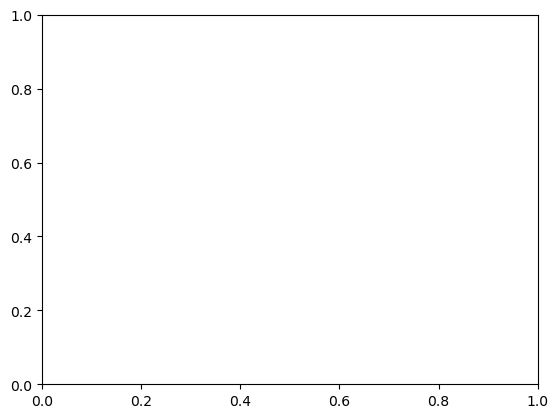

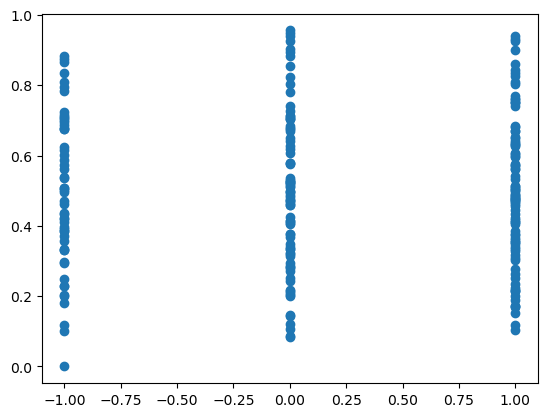

In [192]:
plt.show()

In [194]:
ax.scatter(atomic_and_area_selected_df[('pose','pose','interface_quality_score')], atomic_and_area_selected_df[('shape_complementarity-interface_energy', 'sum', 'selection_weight')])

In [195]:
atomic_and_area_selected_df.drop(('pose','pose','selection_weight'), axis=1, inplace=True)

In [196]:
atomic_and_area_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']].corr()

,selection_weight,interface_quality_score
selection_weight,1.00000,0.03124
interface_quality_score,0.03124,1.00000


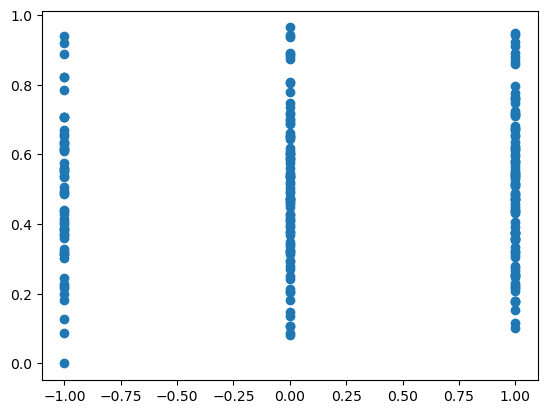

In [197]:
plt.show()

In [200]:
ax.scatter(atomic_and_area_selected_df.loc[km_selected_design_indices, ('pose','pose','interface_quality_score')], atomic_and_area_selected_df.loc[km_selected_design_indices, ('shape_complementarity-interface_energy', 'sum', 'selection_weight')])

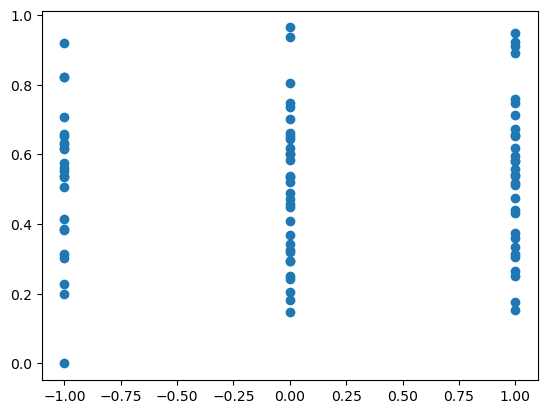

In [201]:
plt.show()

In [126]:
atomic_selected_df

shape_complementarity-interface_energy_density  \
                                                                                              sum   
                                                                                 selection_weight   
3tcr_2dj6-DEGEN_1_1-ROT_11_26-tx_156_clean_asu_...                                       0.985285   
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_sc...                                       0.951563   
3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_sc...                                       0.950337   
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...                                       0.947272   
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_...                                       0.909258   
...                                                                                           ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...                                       0.118945   
3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_sc...                                       0.110975   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...                                       0.106683   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...                                       0.088903   
3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_...                                       0.035561   

                                                            pose  \
                                                            pose   
                                                   design_number   
3tcr_2dj6-DEGEN_1_1-ROT_11_26-tx_156_clean_asu_...           227   
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_sc...           216   
3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_sc...           220   
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...           213   
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_...           211   
...                                                          ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...           196   
3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_sc...            82   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...            46   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...            80   
3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_...           113   

                                                                     \
                                                                      
                                                   selection_weight   
3tcr_2dj6-DEGEN_1_1-ROT_11_26-tx_156_clean_asu_...         0.219936   
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_sc...         0.212219   
3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_sc...         0.136013   
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...         0.321222   
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_...         0.255627   
...                                                             ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...         0.889611   
3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_sc...         0.866252   
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_...         0.746743   
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_...         0.790122   
3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_...         0.904625   

                                                                  \
                                                                   
                                                   contact_count   
3tcr_2dj6-DEGEN_1_1-ROT_11_26-tx_156_clean_asu_...      3.402367   
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_sc...      3.556851   
3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_sc...      3.418338   
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_s...      4.388430   
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_...      3.337979   
...                                                          ...   
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_...      3.706004   
3hrx_4mi

In [101]:
atomic_selected_df[('pose','pose','interface_quality_score')]

3tcr_2dj6-DEGEN_1_1-ROT_11_26-tx_156_clean_asu_scout_hbnet_design_profile_0049_0001     -1
2pd2_3l3s-DEGEN_1_1-ROT_12_7-tx_96_clean_asu_scout_structure_background_0004            -1
3l3s_3q98-DEGEN_1_1-ROT_9_4-tx_239_clean_asu_scout_hbnet_design_profile_0001_3_0001     -1
1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_scout_hbnet_design_profile_0180_0001       1
1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001      0
                                                                                        ..
4wcz_3m6n-DEGEN_1_1-ROT_28_23-tx_361_clean_asu_scout_hbnet_design_profile_0088_0001      1
3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_scout_hbnet_design_profile_0119_0001        0
2gtr_3m6n-DEGEN_1_1-ROT_16_26-tx_301_clean_asu_scout                                     1
3hrx_4knp-DEGEN_1_1-ROT_34_10-tx_216_clean_asu_scout_hbnet_design_profile_0003_1_0001    0
3tf3_4n72-DEGEN_1_2-ROT_17_15-tx_203_clean_asu_scout_structure_background_0005           1

In [100]:
_ = sns.pairplot(atomic_selected_df.droplevel(0, axis=1).droplevel(0, axis=1).loc[:, ['selection_weight', 'interface_quality_score']], kind='reg', diag_kind='kde')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().